In [20]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from mortgage_mc import get_base_config, run_monte_carlo_simulation
from mc_analysis import process_mc_results, display_summary_stats, display_probability_analysis, plot_mc_distributions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
NUM_SIMULATIONS = 10000
base_config = get_base_config()
print(f"  Initial Property Value:  £{base_config['property_value_initial']:,.0f}")
print(f"  Holding Period:        {base_config['holding_period_years']} years")
print(f"  Initial Mortgage Rate (Y1-5): {base_config['initial_mortgage_interest_rate_annual']:.2%}") 
print(f"  Mortgage Term (Total): {base_config['mortgage_term_years']} years")
print(f"  Deposit Percentage:    {base_config['deposit_percentage']:.0%}")
print(f"  Initial Service Charge: £{base_config['service_charge_annual_initial']:,.0f} p.a.")
print(f"  Remortgage Fee:        £{base_config['remortgage_fee']:,.0f}")

  Initial Property Value:  £575,000
  Holding Period:        10 years
  Initial Mortgage Rate (Y1-5): 4.50%
  Mortgage Term (Total): 25 years
  Deposit Percentage:    20%
  Initial Service Charge: £6,500 p.a.
  Remortgage Fee:        £1,000


--- Monte Carlo Simulation Setup (with Remortgage) ---
Number of simulations: 10,000

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       3.0% / 5.0%
  Alt. Investment Ret.:    5.0% / 8.0%
  Service Chg Infl.:      3.5% / 2.5%
  Remortgage Rate (Y6+): 5.0% / 1.5%

Key Fixed Params (from base config):
  Initial Property Value:  £575,000
  Holding Period:        15 years
  Initial Mortgage Rate (Y1-5): 4.50%
  Mortgage Term (Total): 25 years
  Deposit Percentage:    20%
  Initial Service Charge: £6,500 p.a.
  Remortgage Fee:        £1,000

--- Running 10,000 Simulations (This may take a moment...) ---

--- Simulation Complete ---
Duration: 1.94 seconds
Generated 10000 cash scenario results.
Generated 10000 mortgage scenario results.

--- Processing Simulation Results ---
Processed results into DataFrame with shape: (10000, 4)

--- Monte Carlo Results Summary ---

--- Cash Scenario ---
  Net Gain:
mean      £46,011
std      £118,118
min     £-325,231
5%      £-131,489
50%

/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:105: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '£46,011' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_ng['mean'] = f"£{stats_ng['mean']:,.0f}"
/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:118: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.59%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_roi['mean'] = f"{stats_roi['mean']:.2f}%"
/Users/Joseph/repos/mortgage_stuff/mc_analysis.py:105: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '£719,129' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_ng['mean'] = f"£{stats_ng['mean']:,.0f}"
/Users/

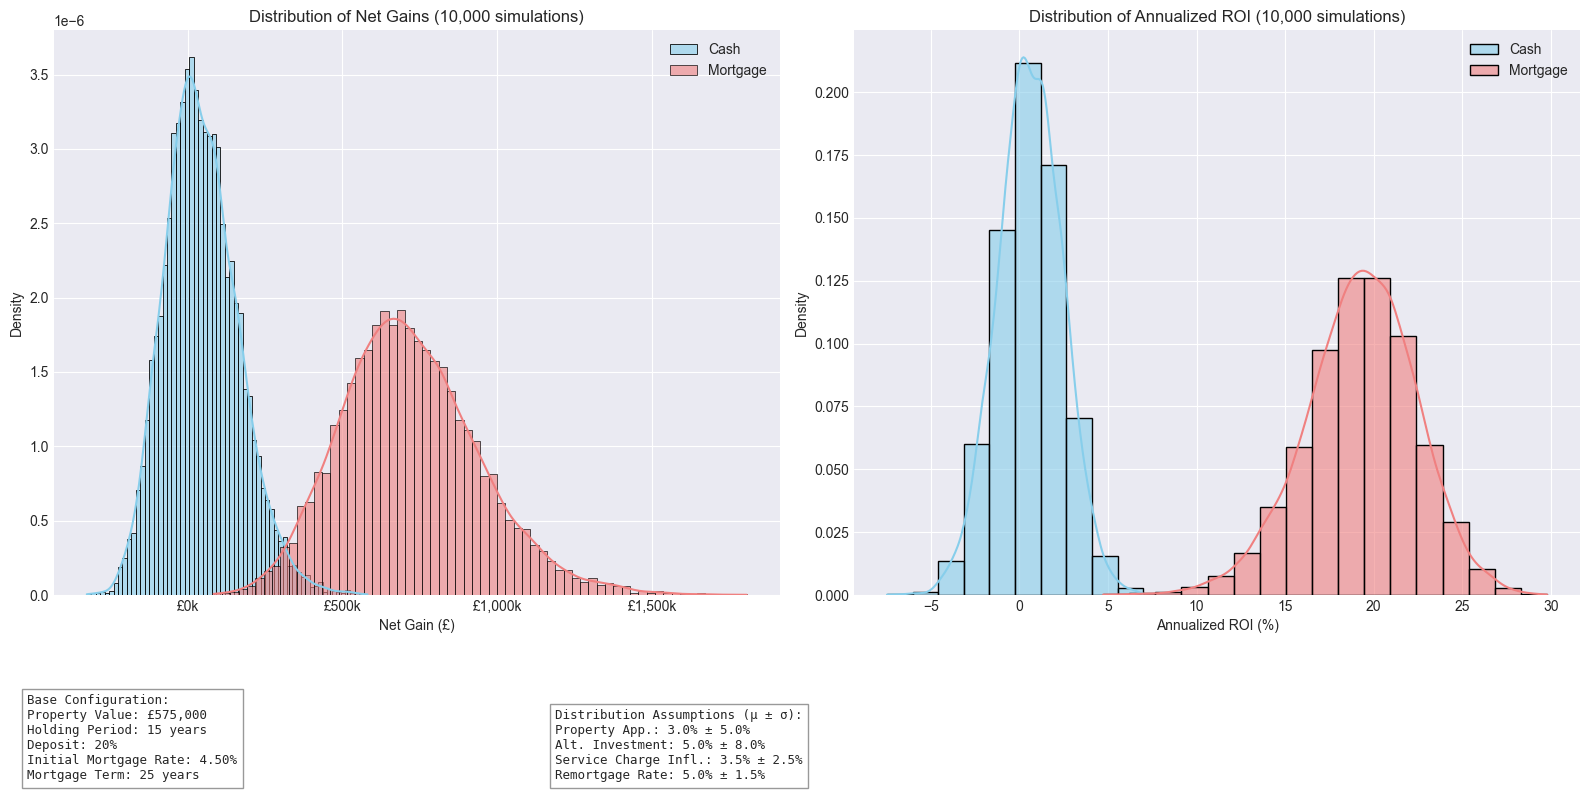

In [34]:
config_updates = dict(
    holding_period_years=15,
)

# replace the base config with the config_updates
config = {**base_config, **config_updates}

# --- Define Assumptions for the Distributions ---
distribution_assumptions = {
    "prop_app_mean": 0.03,      # Average property appreciation p.a.
    "prop_app_std_dev": 0.05,   # Volatility of property appreciation
    "alt_inv_mean": 0.05,       # Average net return on alternative investments p.a.
    "alt_inv_std_dev": 0.08,   # Volatility of alternative investment returns
    "sc_inf_mean": 0.035,       # Average service charge inflation p.a.
    "sc_inf_std_dev": 0.025,  # Volatility of service charge inflation
    "remort_rate_mean": 0.05,       # Expected average mortgage rate in 5 years' time
    "remort_rate_std_dev": 0.015  # Uncertainty around that future rate
}
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

print("--- Monte Carlo Simulation Setup (with Remortgage) ---")
print(f"Number of simulations: {NUM_SIMULATIONS:,}")
print("\nDistribution Assumptions (Mean / Std Dev):")
# (Print statements remain the same as previous notebook version)
print(f"  Property Apprec.:       {distribution_assumptions['prop_app_mean']:.1%} / {distribution_assumptions['prop_app_std_dev']:.1%}")
print(f"  Alt. Investment Ret.:    {distribution_assumptions['alt_inv_mean']:.1%} / {distribution_assumptions['alt_inv_std_dev']:.1%}")
print(f"  Service Chg Infl.:      {distribution_assumptions['sc_inf_mean']:.1%} / {distribution_assumptions['sc_inf_std_dev']:.1%}")
print(f"  Remortgage Rate (Y6+): {distribution_assumptions['remort_rate_mean']:.1%} / {distribution_assumptions['remort_rate_std_dev']:.1%}")
print(f"\nKey Fixed Params (from base config):")
# (Print statements remain the same)
print(f"  Initial Property Value:  £{config['property_value_initial']:,.0f}")
print(f"  Holding Period:        {config['holding_period_years']} years")
print(f"  Initial Mortgage Rate (Y1-5): {config['initial_mortgage_interest_rate_annual']:.2%}") 
print(f"  Mortgage Term (Total): {config['mortgage_term_years']} years")
print(f"  Deposit Percentage:    {config['deposit_percentage']:.0%}")
print(f"  Initial Service Charge: £{config['service_charge_annual_initial']:,.0f} p.a.")
print(f"  Remortgage Fee:        £{config['remortgage_fee']:,.0f}")

# --- Run the Monte Carlo Simulation ---

print(f"\n--- Running {NUM_SIMULATIONS:,} Simulations (This may take a moment...) ---")
start_time = time.time()

cash_mc_results, mortgage_mc_results = run_monte_carlo_simulation(
    base_config=base_config,
    num_simulations=NUM_SIMULATIONS,
    **distribution_assumptions
)
end_time = time.time()
print(f"\n--- Simulation Complete ---")
print(f"Duration: {end_time - start_time:.2f} seconds")
print(f"Generated {len(cash_mc_results)} cash scenario results.")
print(f"Generated {len(mortgage_mc_results)} mortgage scenario results.")

# --- Process Results using mc_analysis module ---

print("\n--- Processing Simulation Results ---")
holding_period = base_config['holding_period_years']
df_processed_results = process_mc_results(cash_mc_results, mortgage_mc_results, holding_period)
print(f"Processed results into DataFrame with shape: {df_processed_results.shape}")


# --- Display Analysis using mc_analysis module ---
# Display Summary Statistics
display_summary_stats(df_processed_results)

# Display Probability Analysis
display_probability_analysis(df_processed_results)


# --- Cell 6: Plot Distributions using mc_analysis module ---
plot_mc_distributions(df_processed_results, NUM_SIMULATIONS, config, distribution_assumptions)